In [ ]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 9.0 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# loading the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', encoding='utf-8')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# getting information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From this, we can see that we have 12 columns, and 891 number of rows, and we have data of types (int, float, object).

In [ ]:
# checking for null values in the dataset
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In the column 'Age', we have 177 entries are null, and in column 'Cabin' we have 687 entries are null.

In [ ]:
# Removing Irrelevant features, which does not contribute much to the prediction, and does not provide any important observation
# Columns: 'Name', 'Tickets', 'PassengerId', 'Cabin'

dataset.drop(columns=['Name', 'Ticket', 'PassengerId', 'Cabin'], inplace=True, axis=1)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# converting "sex" into numerical categories
dataset['Sex'].replace({
    'male': 1,
    'female': 0
}, inplace=True)
dataset['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [ ]:
# converting "embarked" into numerical categories
dataset['Embarked'].replace({
    'S': 0,
    'C': 1,
    'Q': 2
}, inplace=True)
dataset['Embarked'].value_counts()

0.0    644
1.0    168
2.0     77
Name: Embarked, dtype: int64

In [ ]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

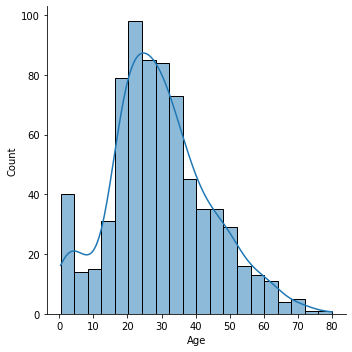

In [ ]:
# checking distribution of Age column
sns.displot(data = dataset, x = 'Age', kde=True)
plt.show()

The mean value of 'Age' column is around 25. So we can replace null values in the age column with the mean value, as the distribution curve is steep, and follow gaussian distribution.

In [ ]:
# replacing null values with mean for 'age' column
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)

In [ ]:
# As the 'Embarked' column is categorical data. So it is good to replace the null values 
# with the mode in this case.
embarked_dict = dict(dataset['Embarked'].value_counts())
mode = max(zip(embarked_dict.values(), embarked_dict.keys()))[1]

dataset['Embarked'].fillna(mode, inplace=True)

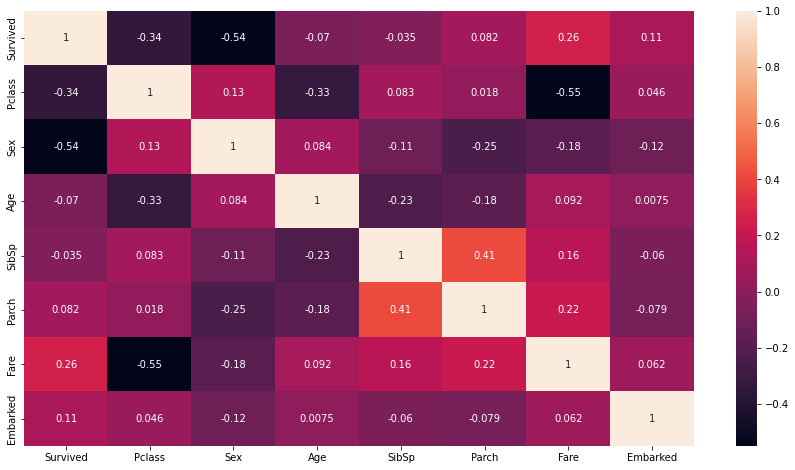

In [ ]:
# now checking for correlation between the columns, and removing the redundant columns
plt.figure(figsize=(15, 8))
correlation = dataset.corr()
sns.heatmap(correlation, annot=True, cbar=True)
plt.show()

From this heatmap, we can see that no two columns are highly correlated.
The correlation coefficient of all the combination is less than 0.8. So we can say that we don't  have any redundant column.

In [ ]:
# Splitting dependent and independent features
X = dataset.drop(columns=['Survived'], axis=1)
Y = dataset['Survived']

# **Sequential Forward Selection**:

It is based on a mix of backward elimination and forward selection. Since it does consider reintroducing the removed predictors into the model, it is thought to be less greedy than the previous two approaches.

In [ ]:
# Define Sequential Forward Selection (sfs)
sffs = SFS(LogisticRegression(),
           k_features='best',
           forward=True,
           floating=True,
           scoring = 'roc_auc',
           cv = 0)

In [ ]:
sffs.fit(X, Y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(), floating=True,
                          k_features=(1, 7), scoring='roc_auc')

In [ ]:
df_sffs_results = pd.DataFrame(sffs.subsets_).transpose()
df_sffs_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)",[0.7668727830505226],0.766873,"(Sex,)"
2,"(0, 1)",[0.8328353518891338],0.832835,"(Pclass, Sex)"
3,"(0, 1, 2)",[0.8478014252388713],0.847801,"(Pclass, Sex, Age)"
4,"(0, 1, 2, 3)",[0.8550075096666986],0.855008,"(Pclass, Sex, Age, SibSp)"
5,"(0, 1, 2, 3, 5)",[0.8560647216097317],0.856065,"(Pclass, Sex, Age, SibSp, Fare)"
6,"(0, 1, 2, 3, 5, 6)",[0.8567251461988303],0.856725,"(Pclass, Sex, Age, SibSp, Fare, Embarked)"
7,"(0, 1, 2, 3, 4, 5, 6)",[0.8566958531727011],0.856696,"(Pclass, Sex, Age, SibSp, Parch, Fare, Embarked)"


From the table above, we can see that the avg ROC_AUC score for the combination ('Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked') is maximum 
among all. So this combination can be the best choice for making our model.

In [ ]:
# Printing the combination of best features for our model.
sffs.k_feature_names_

('Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked')

Building the model using the Logistic Regression and selected features.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=0)

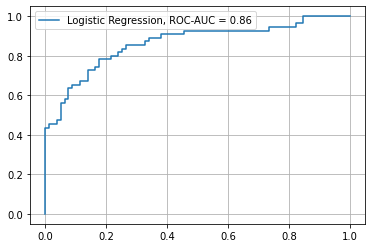

In [ ]:
# model creation

log_regression = LogisticRegression()
log_regression.fit(x_train, y_train)
y_predicted = log_regression.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_predicted)
auc_score = round(roc_auc_score(y_test, y_predicted), 2)

plt.plot(fpr, tpr, label="Logistic Regression, ROC-AUC = " + str(auc_score))
plt.legend()
plt.grid()
plt.show()

As we can see from the curve, and the legend as well. The ROC-AUC score is pretty good for the selected features which is around 0.86.
As in the lecture, we have seen that more the curve or we can say that, more the area under the curve, more better the performance. 

# **Did you find this approach greedy? Explain.**

Yes, In my opinion, this approach is greedy about finding the best subset having the maximum performance measure. 

This method of feature selection comes under the category of "Wrapper Methods".
There are basically three types of wrapper methods:

1. Forward Selection
2. Backward Selection
3. Step-wise selection

I'm using **Step-wise selection**. It is basically the combination of both forward and backward selection methods. This approach is greedy because, it takes every subset of the features, and tries to find the performance of each possibility, and then returns the subset having maximum performance score.

________________________________________________________________________________

**Note:** I understood the question, and tried to implement stimulated annealing, but it is taking too much time and I'm not able to implement it completely. So I'm using this alternative, which is greedy.